In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_excel("churn_prediction.xlsx")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


### Handle missing value & duplicate value

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [178]:
df.duplicated().any()

False

In [179]:
cols_to_fillna = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder"]
df[cols_to_fillna] = df[cols_to_fillna].fillna(df[cols_to_fillna].median(numeric_only=True))
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [181]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


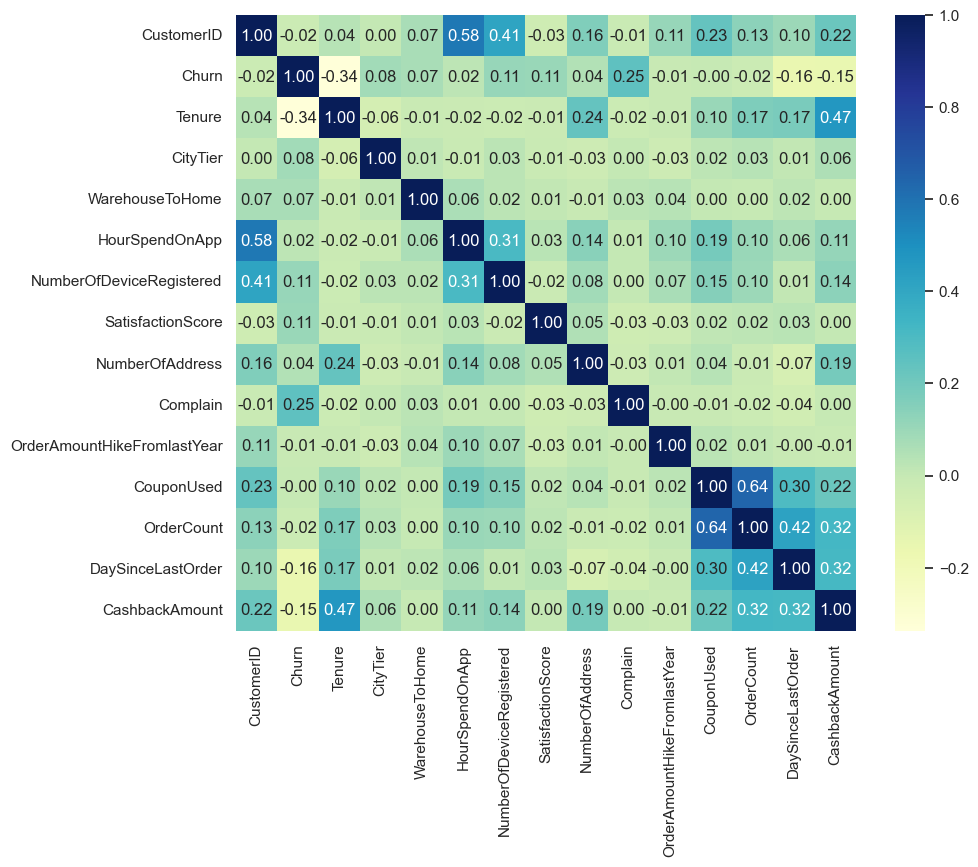

In [183]:
sns.set(rc={'figure.figsize':(10,8)})
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt=".2f")

##### Looking at the matrix , there are 2 columns that correlate with the Churn column: Tenure and Complain, in which the Tenure column is negatively correlated and the Complain column is positively correlated.

In [184]:
def count_percentage(df, column, target, count):
  
    churn = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    
    cate_df = churn.merge(not_churn, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churn',count+'_y':'not_churn'}, inplace = True)
    
    cate_df['% churn'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])
    
    return cate_df 

### PreferredLoginDevice

In [185]:
logindevice_churn = count_percentage(df, 'PreferredLoginDevice', 'Churn', 'CustomerID')
logindevice_churn

,PreferredLoginDevice,churn,not_churn,% churn
0,Mobile Phone,624,3372,0.156156
1,Computer,324,1310,0.198286


### Gender

In [188]:
gender_churn = count_percentage(df, 'Gender', 'Churn', 'CustomerID')
gender_churn

,Gender,churn,not_churn,% churn
0,Male,600,2784,0.177305
1,Female,348,1898,0.154942


##### As the two tables above show, the percentage of churn and not_churn between Male & Female and Mobile & Computer is not significantly different => We can conclude that PreferredLoginDevice and Gender have no relationship with target column.

### PreferredPaymentMode

In [186]:
paymentmode_churn = count_percentage(df, 'PreferredPaymentMode', 'Churn', 'CustomerID')
paymentmode_churn

,PreferredPaymentMode,churn,not_churn,% churn
0,Debit Card,356,1958,0.153846
1,Credit Card,252,1522,0.142052
2,E wallet,140,474,0.228013
3,Cash on Delivery,128,386,0.249027
4,UPI,72,342,0.173913


<Axes: xlabel='PreferredPaymentMode', ylabel='% churn'>

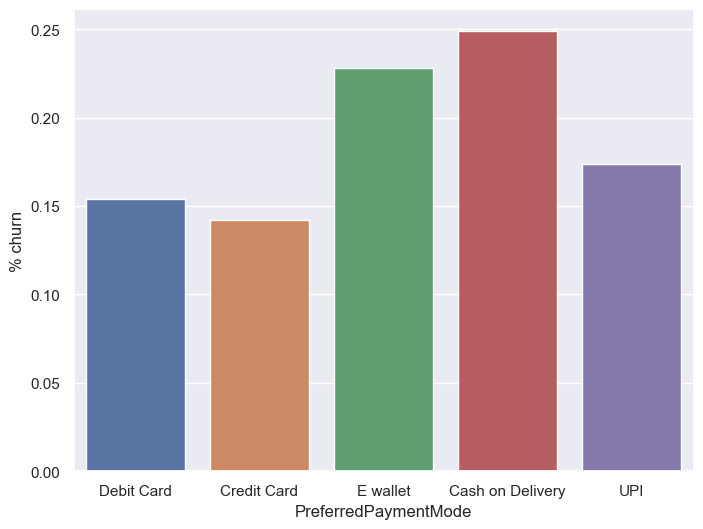

In [191]:
plt.figure(figsize=(8, 6))
sns.barplot(data=paymentmode_churn, x='PreferredPaymentMode', y='% churn')

### PreferedOrderCat

In [189]:
ordercat_churn = count_percentage(df, 'PreferedOrderCat', 'Churn', 'CustomerID')
ordercat_churn

,PreferedOrderCat,churn,not_churn,% churn
0,Mobile Phone,570,1510,0.274038
1,Laptop & Accessory,210,1840,0.102439
2,Fashion,128,698,0.154964
3,Grocery,20,390,0.048780
4,Others,20,244,0.075758


<Axes: xlabel='PreferedOrderCat', ylabel='% churn'>

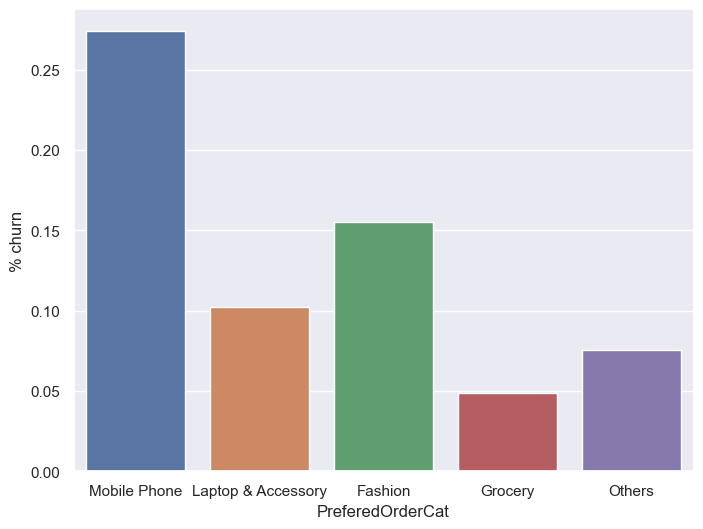

In [192]:
plt.figure(figsize=(8, 6))
sns.barplot(data=ordercat_churn, x='PreferedOrderCat', y='% churn')

### MaritalStatus

In [193]:
status_churn = count_percentage(df, 'MaritalStatus', 'Churn', 'CustomerID')
status_churn

,MaritalStatus,churn,not_churn,% churn
0,Single,480,1316,0.267261
1,Married,344,2642,0.115204
2,Divorced,124,724,0.146226


<Axes: xlabel='MaritalStatus', ylabel='% churn'>

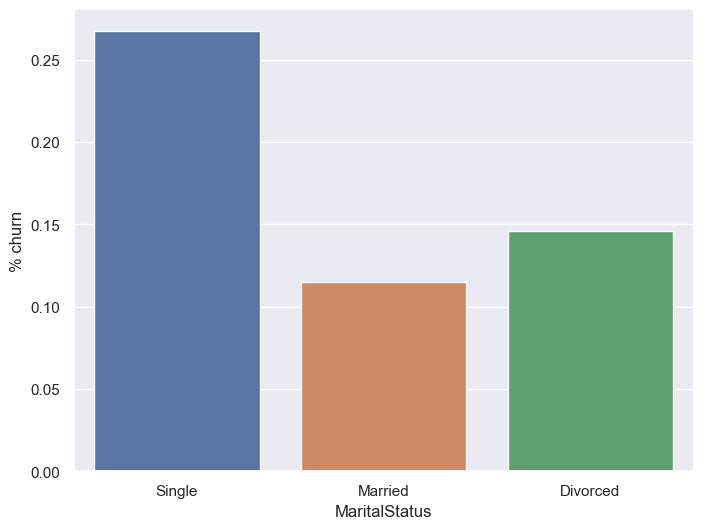

In [194]:
plt.figure(figsize=(8, 6))
sns.barplot(data=status_churn, x='MaritalStatus', y='% churn')

#### As the tables and chart above show, the patterns/behavior of churned users is:
- Complain a lot
- Low tenure
- Preferred order category in last month is Mobile Phone
- Preferred payment method is Cash on Delivery
- Marital status is Single 

#### To reduce churn users, here are some suggestions for the company:
- Enhance customer service by promptly addressing complaints and issues. This can include improving customer support processes and facilitating feedback.
- Promotions exclusively for Single Customers: Specially create incentives, discounts or reward programs for single customers.
- Create loyalty programs that offer rewards, discounts, or exclusive perks to customers with longer tenure.
- Encourage customers to diversify their payment methods by offering incentives for trying alternative payment options. Promote the convenience and security of online payment methods.
- Optimize the mobile shopping experience and improve company's mobile app or website

## **Conclusion**

After EDA we will keep the below columns to the model: 
* Tenure
* Complain
* PreferredPaymentMode 
* PreferedOrderCat
* MaritalStatus

In [149]:
df_model= df[['Tenure','Complain', 'PreferredPaymentMode','PreferedOrderCat','MaritalStatus', 'Churn']]
df_model

,Tenure,Complain,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Churn
0,4.0,1,Debit Card,Laptop & Accessory,Single,1
1,9.0,1,UPI,Mobile,Single,1
2,9.0,1,Debit Card,Mobile,Single,1
3,0.0,0,Debit Card,Laptop & Accessory,Single,1
4,0.0,0,Credit Card,Mobile,Single,1
...,...,...,...,...,...,...
5625,10.0,0,Credit Card,Laptop & Accessory,Married,0
5626,13.0,0,Credit Card,Fashion,Married,0
5627,1.0,1,Debit Card,Laptop & Accessory,Married,0
5628,23.0,0,Credit Card,Laptop & Accessory,Married,0


### Encoding & Normalizing

In [150]:
list_columns = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
df_model = pd.get_dummies(df_model, columns = list_columns)
df_model

,Tenure,Complain,Churn,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,9.0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,9.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5626,13.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5627,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5628,23.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [151]:
list_columns = df_model.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_df = df_model[list_columns]
scaler = MinMaxScaler()
model=scaler.fit(filter_df)
scaled_data=model.transform(filter_df)

df_model = pd.DataFrame(scaled_data, columns = list_columns)

df_model

,Tenure,Complain,Churn,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.147541,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.147541,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.163934,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5626,0.213115,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.016393,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,0.377049,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Apply Model

### Logistic Regression

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Balanced Accuracy Train: 0.6818336755549639
Balanced Accuracy Test: 0.6750630569329024


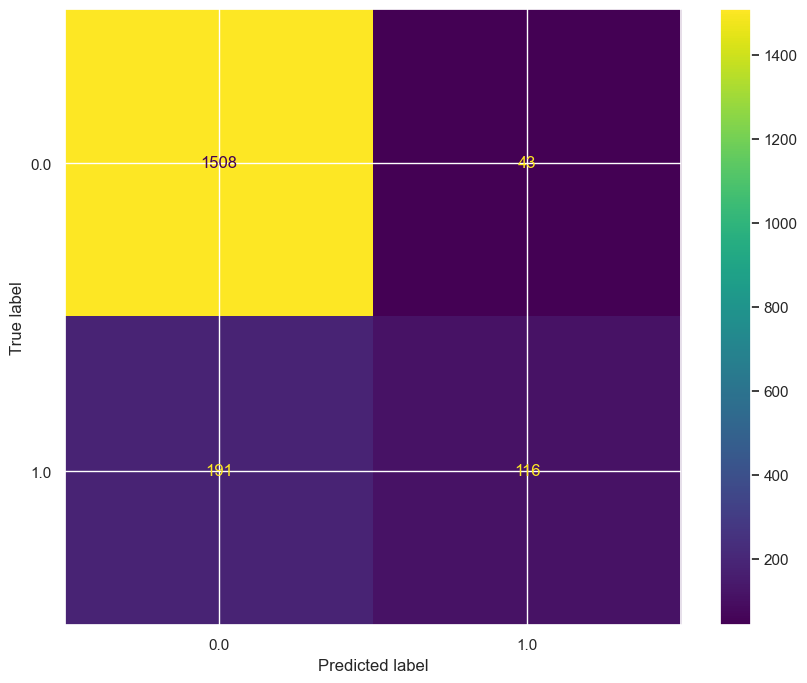

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay


x = df_model.drop('Churn', axis=1)
y = df_model['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}
clf = LogisticRegression(random_state=0)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_balanced_accuracy_train = grid_search.best_score_


y_pred_test = grid_search.predict(x_test)
best_balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)


cm = confusion_matrix(y_test, y_pred_test, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)
disp.plot()


print("Best Hyperparameters:", best_params)
print("Balanced Accuracy Train:", best_balanced_accuracy_train)
print("Balanced Accuracy Test:", best_balanced_accuracy_test)

### KNN

Best k: 3
Balanced Accuracy Train: 0.7172943647346842
Balanced Accuracy Test: 0.7179659230043872


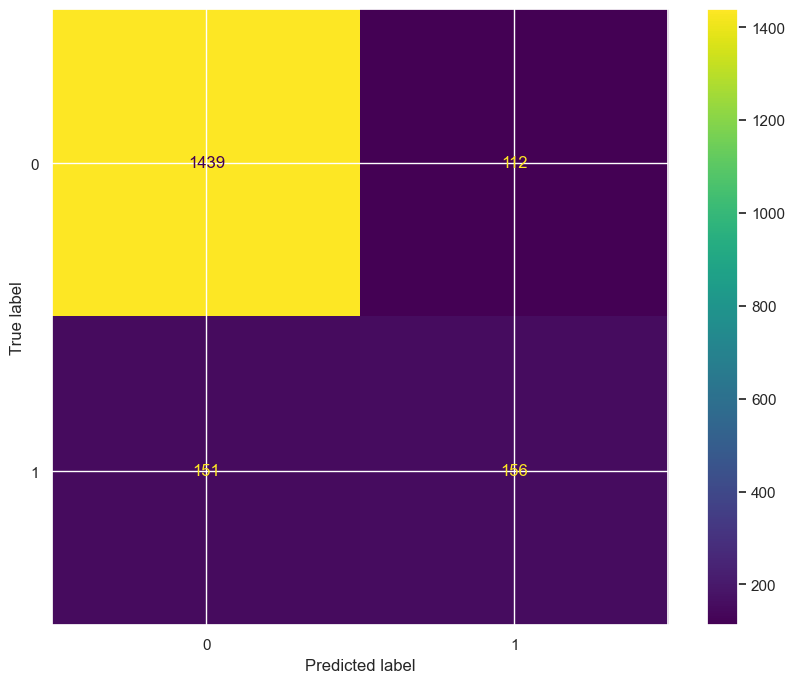

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


parameters = {"n_neighbors": np.arange(3, 20)}
knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid=parameters, scoring='balanced_accuracy', cv=5)
grid_search.fit(x_train, y_train)


best_k = grid_search.best_params_["n_neighbors"]
best_balanced_accuracy_train = grid_search.best_score_


y_pred_test = grid_search.predict(x_test)
best_balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()


print("Best k:", best_k)
print("Balanced Accuracy Train:", best_balanced_accuracy_train)
print("Balanced Accuracy Test:", best_balanced_accuracy_test)


#### According to the above two models, Balanced Accuracy Test of Logistic Regression Model is 67.5% and Balanced Accuracy Test of KNN Model is 71.8%. Therefore, company should use KNN Model to predict churned users.